In [1]:
from scipy import misc

In [2]:
img = misc.face()

In [4]:
img.ndim

3

In [5]:
img.shape

(768, 1024, 3)

In [6]:
img.size

2359296

In [7]:
img.dtype

dtype('uint8')

In [8]:
type(img)

numpy.ndarray

In [12]:
img[0,:,:]

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [119, 126,  74],
       [131, 136,  82],
       [139, 144,  90]], dtype=uint8)

In [13]:
img.max()

255

In [14]:
img.min()

0

In [8]:
import matplotlib.pyplot as plt

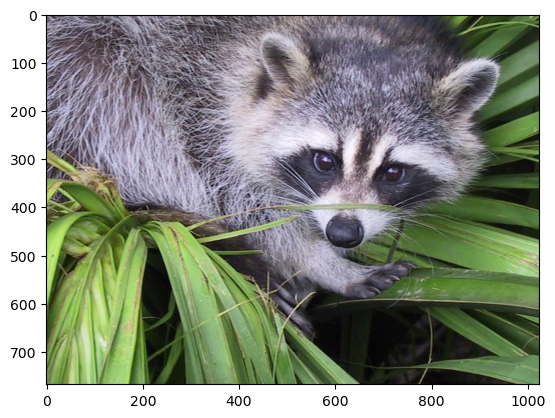

In [16]:
plt.imshow(img)
plt.show()

In [17]:
img[:,:,0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [19]:
img[:,:,1].shape

(768, 1024)

In [20]:
img_array = img / 255

In [21]:
img_array.max(),img_array.min()

(1.0, 0.0)

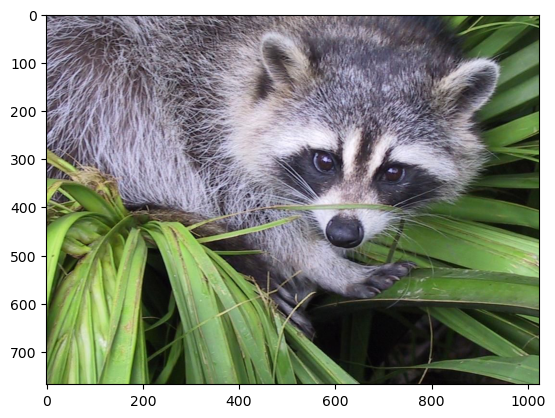

In [22]:
plt.imshow(img_array)
plt.show()

In [23]:
img_array.dtype

dtype('float64')

In [24]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [25]:
red_array

array([[0.4745098 , 0.54117647, 0.6       , ..., 0.46666667, 0.51372549,
        0.54509804],
       [0.34901961, 0.43137255, 0.50980392, ..., 0.4627451 , 0.5254902 ,
        0.57254902],
       [0.28627451, 0.36862745, 0.45098039, ..., 0.45882353, 0.52156863,
        0.56470588],
       ...,
       [0.34117647, 0.36862745, 0.41960784, ..., 0.47058824, 0.46666667,
        0.46666667],
       [0.33333333, 0.37254902, 0.43921569, ..., 0.4745098 , 0.47058824,
        0.47058824],
       [0.33333333, 0.38039216, 0.43529412, ..., 0.47058824, 0.46666667,
        0.4627451 ]])

In [26]:
from numpy import linalg

In [27]:
img_gray = img_array @ [0.2126,0.7152,0.0722]

In [28]:
img_gray.shape

(768, 1024)

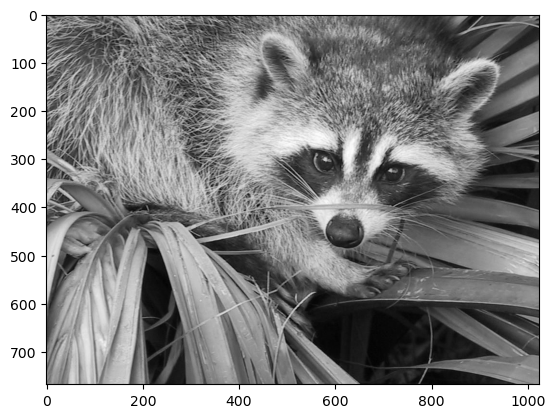

In [29]:
plt.imshow(img_gray,cmap='gray')
plt.show()

In [30]:
U,s,Vt = linalg.svd(img_gray)

In [32]:
U.shape,s.shape,Vt.shape

((768, 768), (768,), (1024, 1024))

In [33]:
U @ s

array([-14.82934258, -15.64213083, -14.11270338, -11.83441097,
       -11.22274112, -12.0353505 , -13.47822804, -14.71083649,
       -12.81620569, -14.75900199, -16.39875751, -15.92262872,
       -14.2169179 , -15.3288541 , -14.70930414, -12.08341602,
       -13.22480892, -17.99291819, -18.52242787, -16.64750177,
       -15.22914737, -13.38720335, -10.1227432 ,  -7.90847967,
        -9.96630176, -12.48284105,  -8.99099249,  -6.41657917,
        -9.19740108, -11.01006464,  -9.07085404,  -7.4107021 ,
        -8.52112075,  -8.63687911,  -9.4459556 , -11.50462072,
       -13.96566515, -13.98513718, -11.50377238,  -9.98170743,
        -6.604055  ,  -6.3496544 ,  -7.7850486 , -10.14026006,
       -10.39553704,  -8.22701164,  -6.10672313,  -5.54959637,
        -6.85210974,  -9.68592061, -10.1594951 ,  -8.12163263,
        -7.79271711,  -9.71728949,  -9.69867931,  -7.43358508,
        -6.53419533,  -9.5636305 , -13.01997283, -14.45013707,
       -14.2560003 , -12.80652392, -11.85222051, -12.46

In [34]:
s @ Vt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 768)

In [35]:
import numpy as np

In [37]:
Sigma = np.zeros((U.shape[1],Vt.shape[0]))
Sigma.shape

(768, 1024)

In [38]:
np.fill_diagonal(Sigma,s)

In [39]:
Sigma

array([[410.42098224,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  85.56090199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  63.61066707, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [41]:
linalg.norm(img_gray - U@Sigma@Vt)

1.4108253216554015e-12

In [43]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

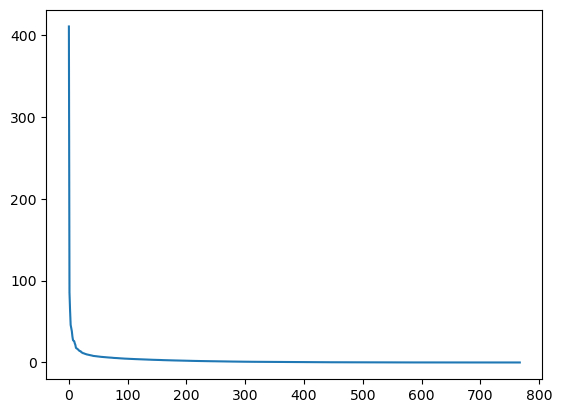

In [44]:
plt.plot(s)
plt.show()

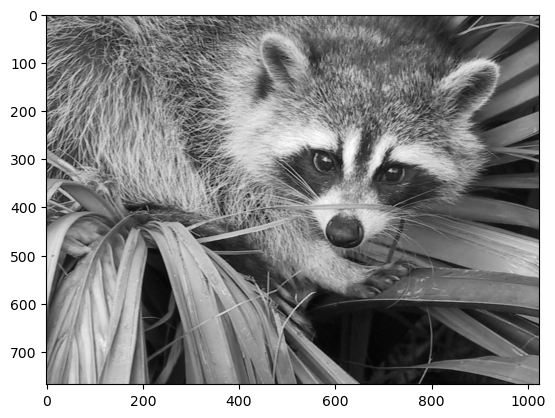

In [52]:
k=500
approx = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(approx,cmap='gray')
plt.show()

In [9]:
from PIL import Image

In [10]:
img_path = 'img01.jpeg'

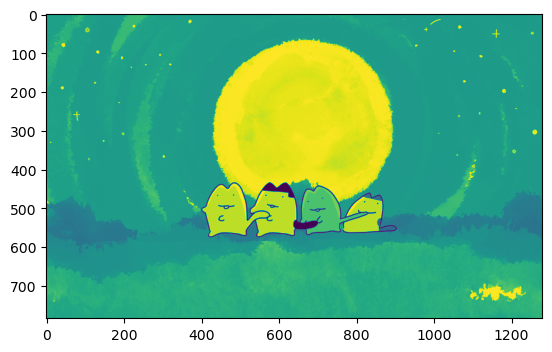

In [21]:
img = Image.open(img_path).convert('L')
plt.imshow(img)
plt.show()

In [22]:
type(img)

PIL.Image.Image

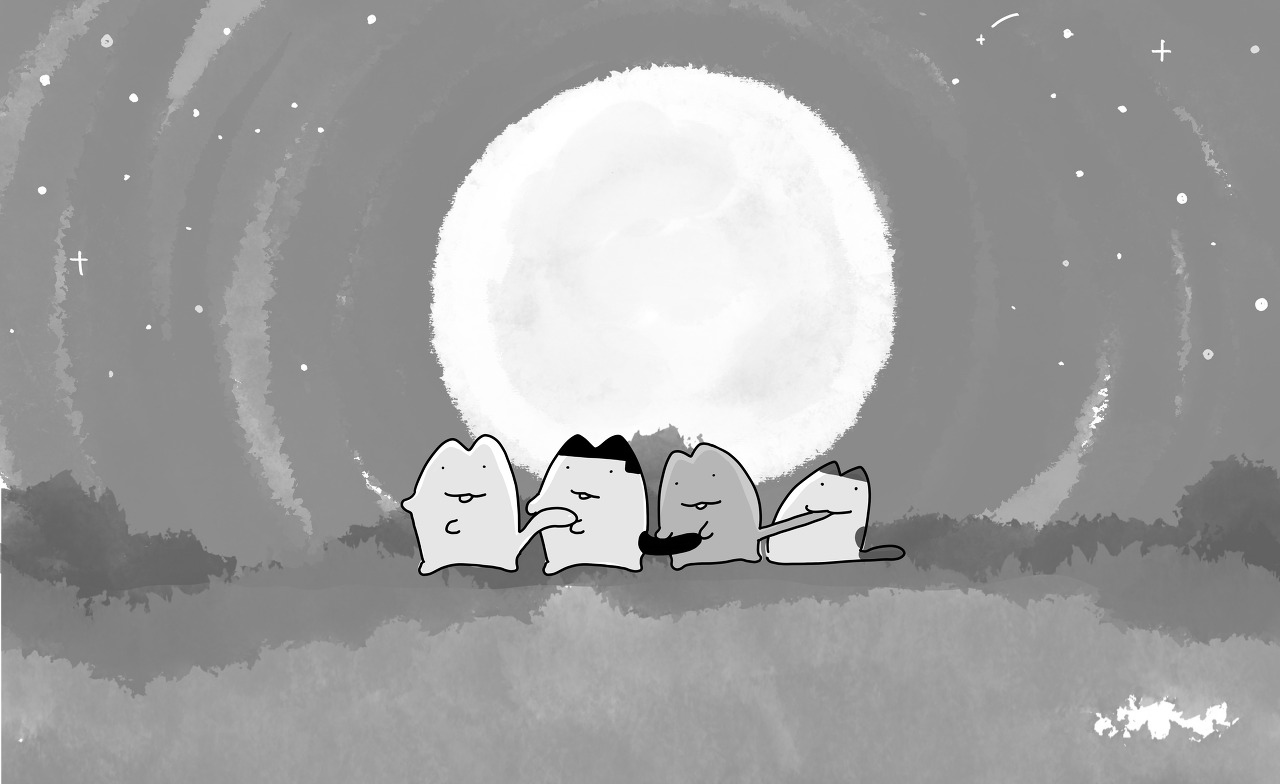

In [23]:
img

In [24]:
np.array(img)

array([[146, 145, 145, ..., 140, 140, 140],
       [146, 145, 145, ..., 140, 140, 140],
       [145, 145, 145, ..., 140, 140, 140],
       ...,
       [253, 174, 148, ..., 169, 169, 168],
       [253, 174, 149, ..., 170, 169, 168],
       [253, 175, 150, ..., 170, 169, 168]], dtype=uint8)

In [27]:
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [28]:
img

array([[[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[120, 151, 180],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       ...,

       [[249, 255, 244],
        [167, 181, 158],
        [141, 157, 120],
        ...,
        [159, 180, 141],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 244],
        [167, 181, 158],
        [142, 158, 121],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 244],
        [168, 182, 159],
        [143, 159, 122],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]]

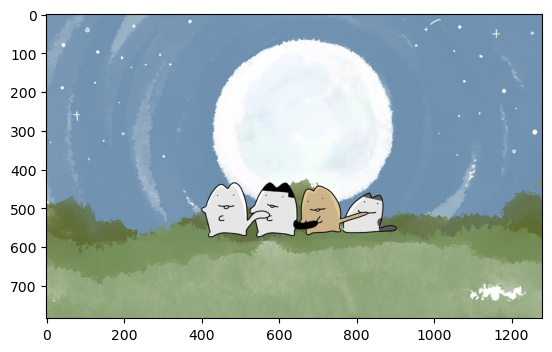

In [29]:
plt.imshow(img)
plt.show()